In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 32502
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=1>
   FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l  name  Lab 
   MHz       MHz   MHz nm2         1 / cm          u                                                                                                 
 float64   float64 float64 int64  float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 str4  bool
---------- ------- ------- ----- --------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ---- -----
88977.2177   0.015 -8.1232     3 1281.5993    67    32   502   303    33     7    26    --    --    --    34     5    29    --    --    -- D2CO False, <Table length=2>
   FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l  name  Lab 
   MHz       MHz   MHz nm2         1 / cm          u            

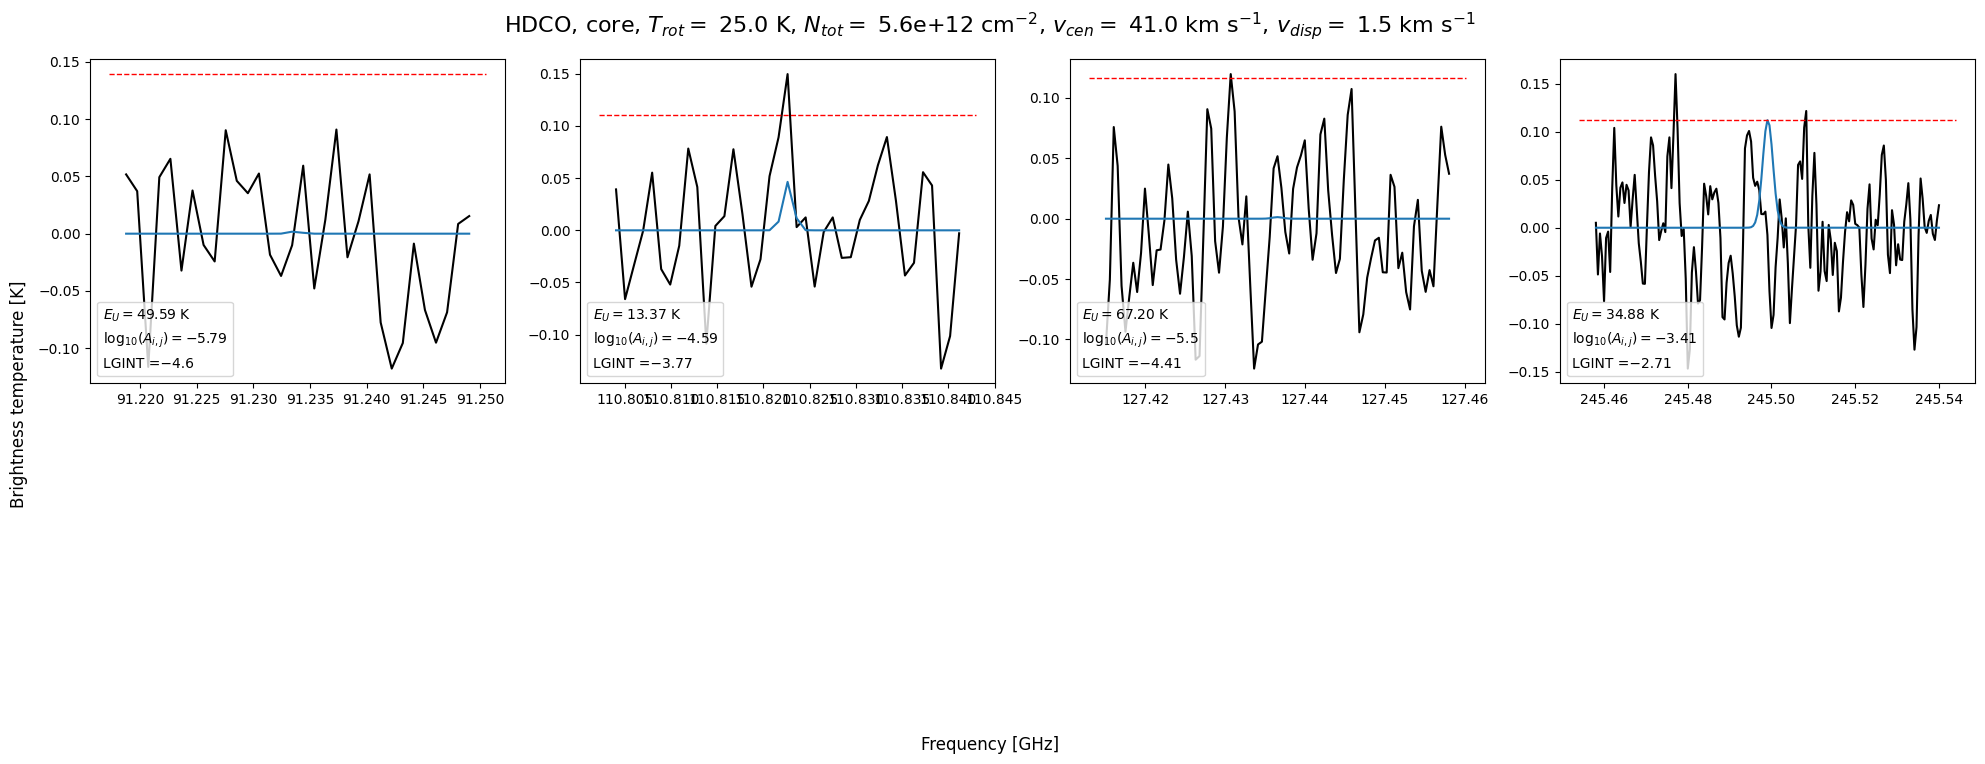

In [11]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 25., N_tot = 5.6e+12, v_cen = 41.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=8, 
               nrows=2, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'D2CO', extr_type="coord", 
               crd=crd, show_2_sigma=True, LGINT_cutoff=-5)

In [12]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

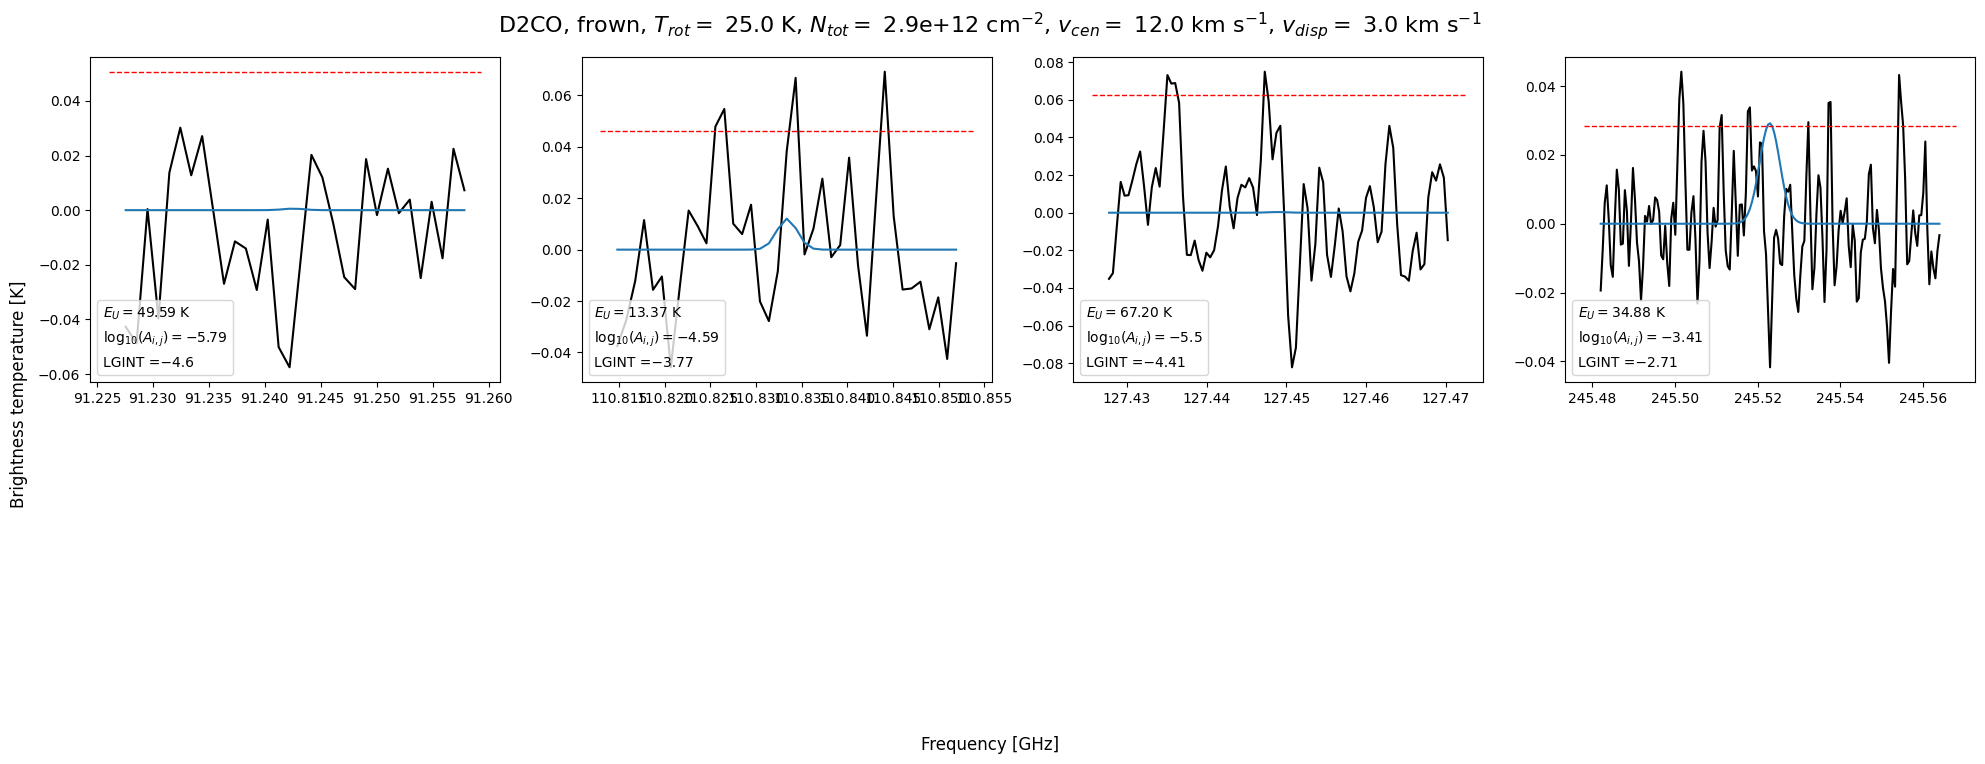

In [26]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 25., N_tot = 2.9e+12, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=8, 
                       nrows=2, ncols=4, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'D2CO', extr_type="reg", 
                       just_data=False, show_2_sigma=True, return_freqs=True, LGINT_cutoff=-5)

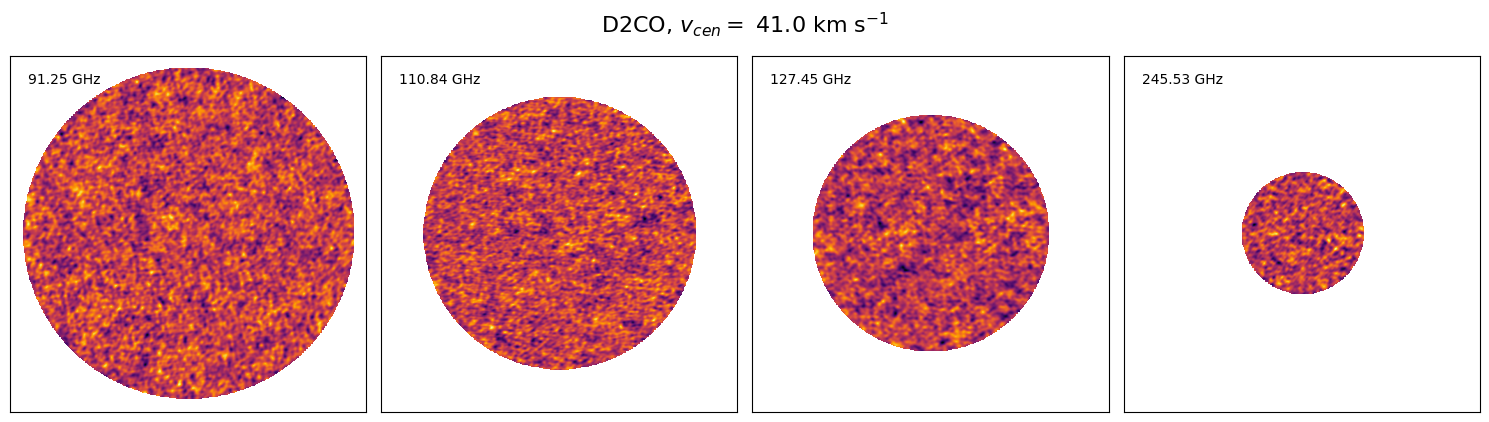

In [19]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=41*u.km/u.s, fig_width=15, fig_height=8, nrows=2, ncols=4, name_for_plot=f'D2CO')

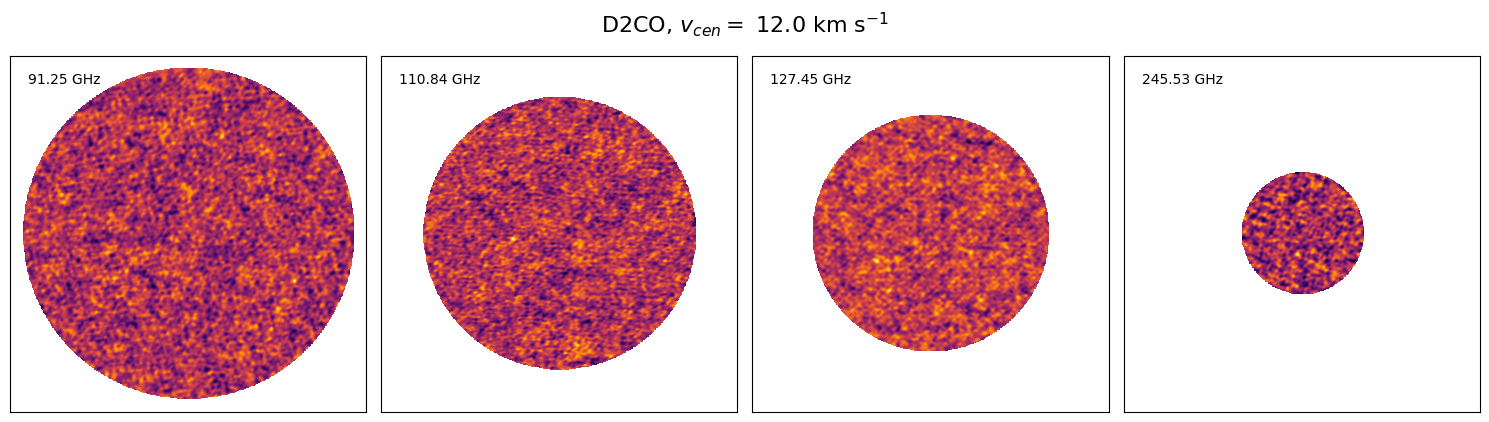

In [20]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=15, fig_height=8, nrows=2, ncols=4, name_for_plot=f'D2CO')